# M4.D3: Calculating free energies of chemical systems

## Learning Objectives

* Reproduce the calculation of the potential of mean force along the dihedral angle of ethane and butane.

# Free energies as a function of a geometric parameter

The free energy of a system is related to the partition function.

$$
G = -RT ln(Q)
$$

Now, the free energy in absolute terms carries very little meaning, but the free energy as a function of a parameter (think of a reaction parameter) will  be a function that would allow us to see how energy changes as a function of that parameter.

$$
G(r) = -RT ln(Q(r))
$$

The term $Q(r)$ is never written like that but it can be thought as all the summation of all the configurations when the parameter "r" is held constant. This calculation is called the potential of mean force.

Below we will see the application of two systems where we try to calculate the PMF along two parameters

1. System 1: the free energy of rotation in the molecule of ethane
2. System 2: the free energy of folding in a small peptide

# Free energy of rotation in ethane

https://xavierprat.github.io/Blog/posts/calculating_pmf/

1. In our shared folder download the zip file ethane.tar.gz, unpack the file dihed_300_5ns.txt and place it where you can read it.
2. Plot the dihedral as a function of time.
3. Build a histogram of the dihedral.
4. Calculate the free energy along the dihedral: calcualte the logarithm of the histogram multiply it by RT.

## Is one nanosecond simulation long enough?

1. The time-step is one femtoseconds. How many steps is one nanosecond simulation?
1. Plot the dihedral over time
2. Discard the first 100 steps for "equilibration"
3. Build a histogram
4. Calculate the free energy along the dihedral
5. A more accurate calculation would require to not use all consecutive steps because two consecutive steps are too correlated and therefore they overrepresent the phase space they are in. Recalculate the free energy by only using one every five data points.
6. Fun challenge: build a function that calculates the energy barrier and the dihedral at the barrier.

200020
199920


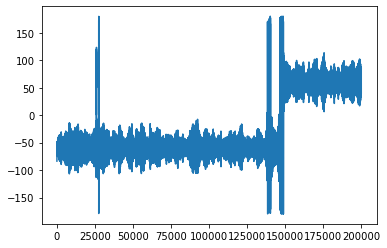

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def getNumbers(inList):
    outList = []
    for line in inList:
        numb = line.split("\t")[1].strip()
        outList.append(float(numb) )
    return(outList)

print(len(rawData300_1ns))
rawData300_1ns = rawData300_1ns[100:]
print(len(rawData300_1ns))

rawData300_1ns = open("dihedral_300.txt","r").readlines()
cleanData300_1ns = getNumbers(rawData300_1ns)
plt.plot(cleanData300_1ns);

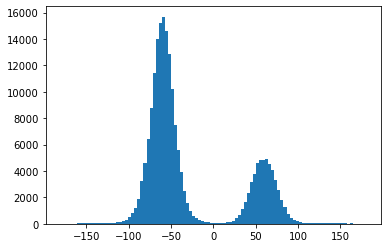

In [5]:
#play a little with the number of bins
results = plt.hist(cleanData300_1ns,bins=100)
#plt.hist returns a list with the numbers of histogram and bins that it's plotting
freq = results[0]
bins = results[1]

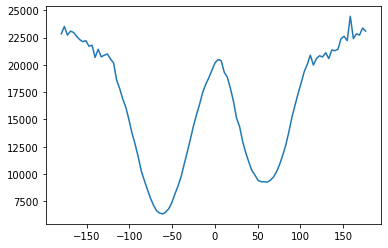

In [14]:
density300_1ns = freq/sum(freq)
free_energy = -8.31*300*np.log(density300_1ns)
#careful, the bins are the edges of the bins, so n frequencies have n+1 bins, just cut the last one
plt.plot(bins[:-1], free_energy)

## What if we increase the temperature at 600K?

In [ ]:
rawData600_1ns = open("dihedral.txt","r").readlines()

## Running a longer simulation: 5ns

In [ ]:
rawData300_5ns = open("dihedral.txt","r").readlines()

# The free energy along the dihedral angle of butane

Calculate the free energy along the dihedral for this 100 ps simulation of butane. We didn't save the structure at each step. How often did we save it?

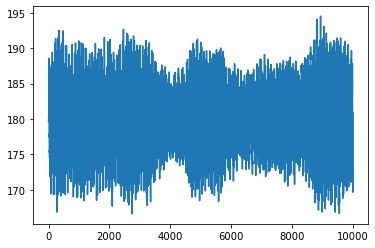

In [15]:
butane = open("butane_dihedra.txt","r").readlines()
butaneData = []
for line in butane:
    thisX = float( line.split()[1].strip() )
    #extend the dihedral past 180
    if thisX < 0:
        thisX = 360+thisX
    butaneData.append(thisX)
plt.plot(butaneData);

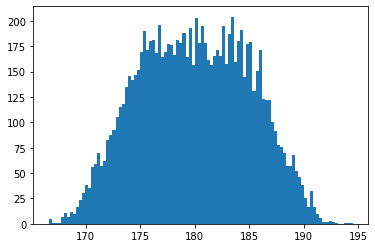

In [16]:
results = plt.hist(butaneData,bins=100)
#plt.hist returns a list with the numbers of histogram and bins that it's plotting
freq = results[0]
bins = results[1]

## Running 2ns of butane

As we see above, 200ps was not enough. We are now loading a 2ns simulations where we save one structure every 10 steps.

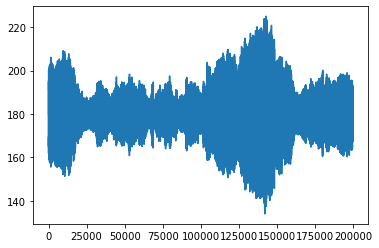

In [17]:

butane = open("butane_2ns.txt","r").readlines()
butaneData = []
for line in butane:
    thisX = float( line.split()[1].strip() )
    #extend the dihedral past 180
    if thisX < 0:
        thisX = 360+thisX
    butaneData.append(thisX)
plt.plot(butaneData);

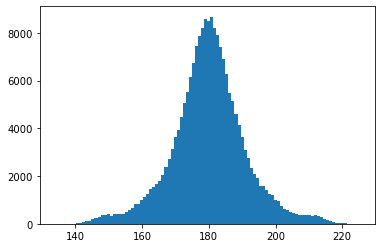

In [18]:
results = plt.hist(butaneData,bins=100)
#plt.hist returns a list with the numbers of histogram and bins that it's plotting
freq = results[0]
bins = results[1]

# Questions

* Write in a separate notebook your own version of the calculations shown here.